In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler

In [4]:
data=pd.read_csv(r"/content/Titanic_train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test=pd.read_csv(r"/content/Titanic_test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test[test.duplicated(keep=False)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [8]:
test.drop(["Name","Ticket",'PassengerId'],axis=1,inplace=True)

In [9]:
test.Cabin=data.Cabin.fillna("Unknown")

In [10]:
test[test.select_dtypes(include="object").columns]=test.select_dtypes(include="object").astype("category")

In [11]:
data[data.duplicated(keep=False)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
data.drop(["Name","Ticket",'PassengerId'],axis=1,inplace=True)

In [15]:
data.Cabin=data.Cabin.fillna("Unknown")

In [16]:
data[data.select_dtypes(include="object").columns]=data.select_dtypes(include="object").astype("category")

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    category
 3   Age       714 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Cabin     891 non-null    category
 8   Embarked  889 non-null    category
dtypes: category(3), float64(2), int64(4)
memory usage: 50.9 KB


In [18]:
test.Embarked=test.Embarked.fillna(data.Embarked.mode()[0])

In [19]:
data.Embarked=data.Embarked.fillna(data.Embarked.mode()[0])

In [20]:
data.select_dtypes(include="number").skew()

,0
Survived,0.478523
Pclass,-0.630548
Age,0.389108
SibSp,3.695352
Parch,2.749117
Fare,4.787317


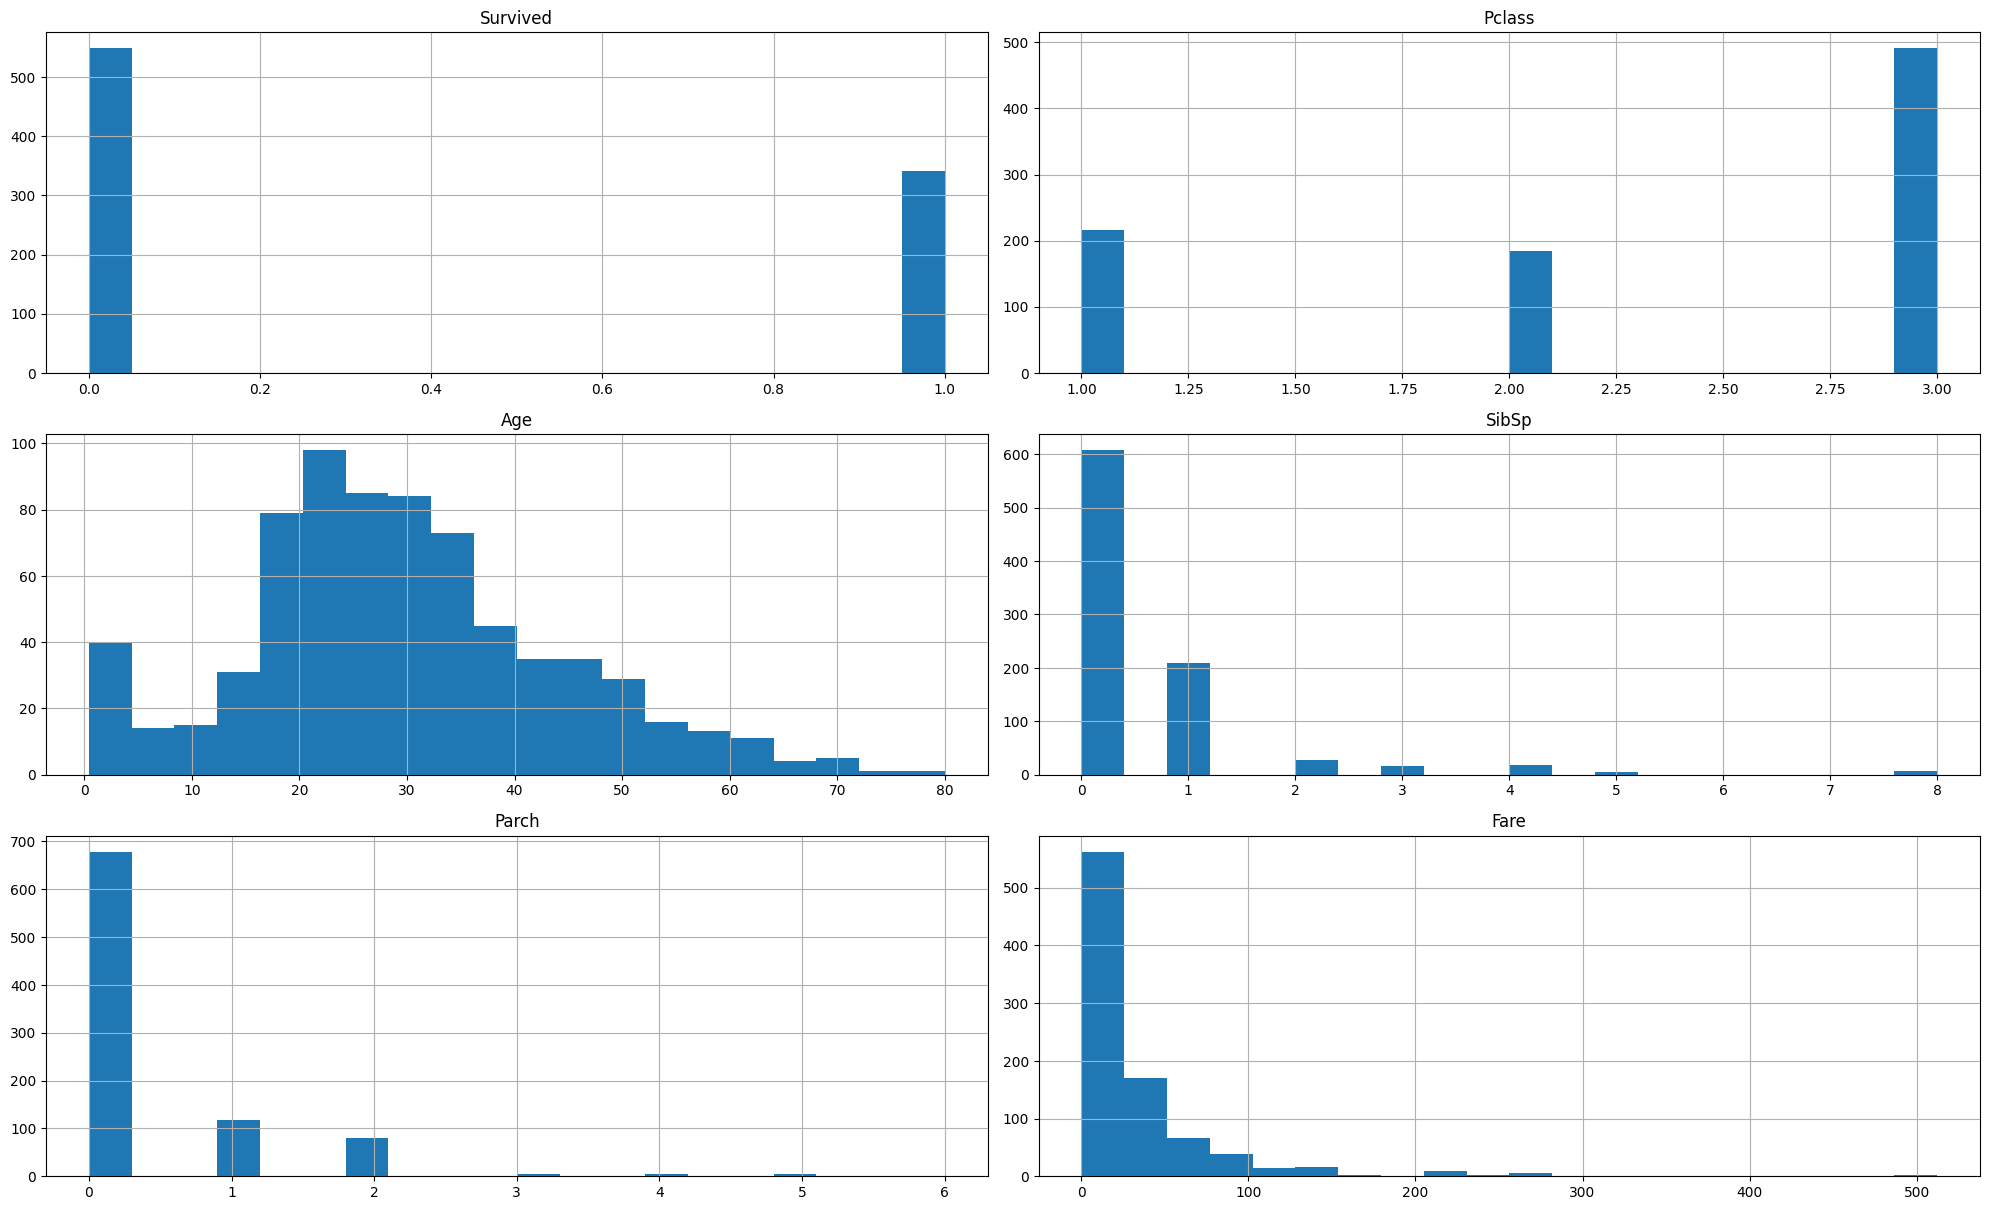

In [21]:
data.select_dtypes(include="number").hist(bins=20,layout=(5,2),figsize=(20,20))
plt.tight_layout()
plt.show()

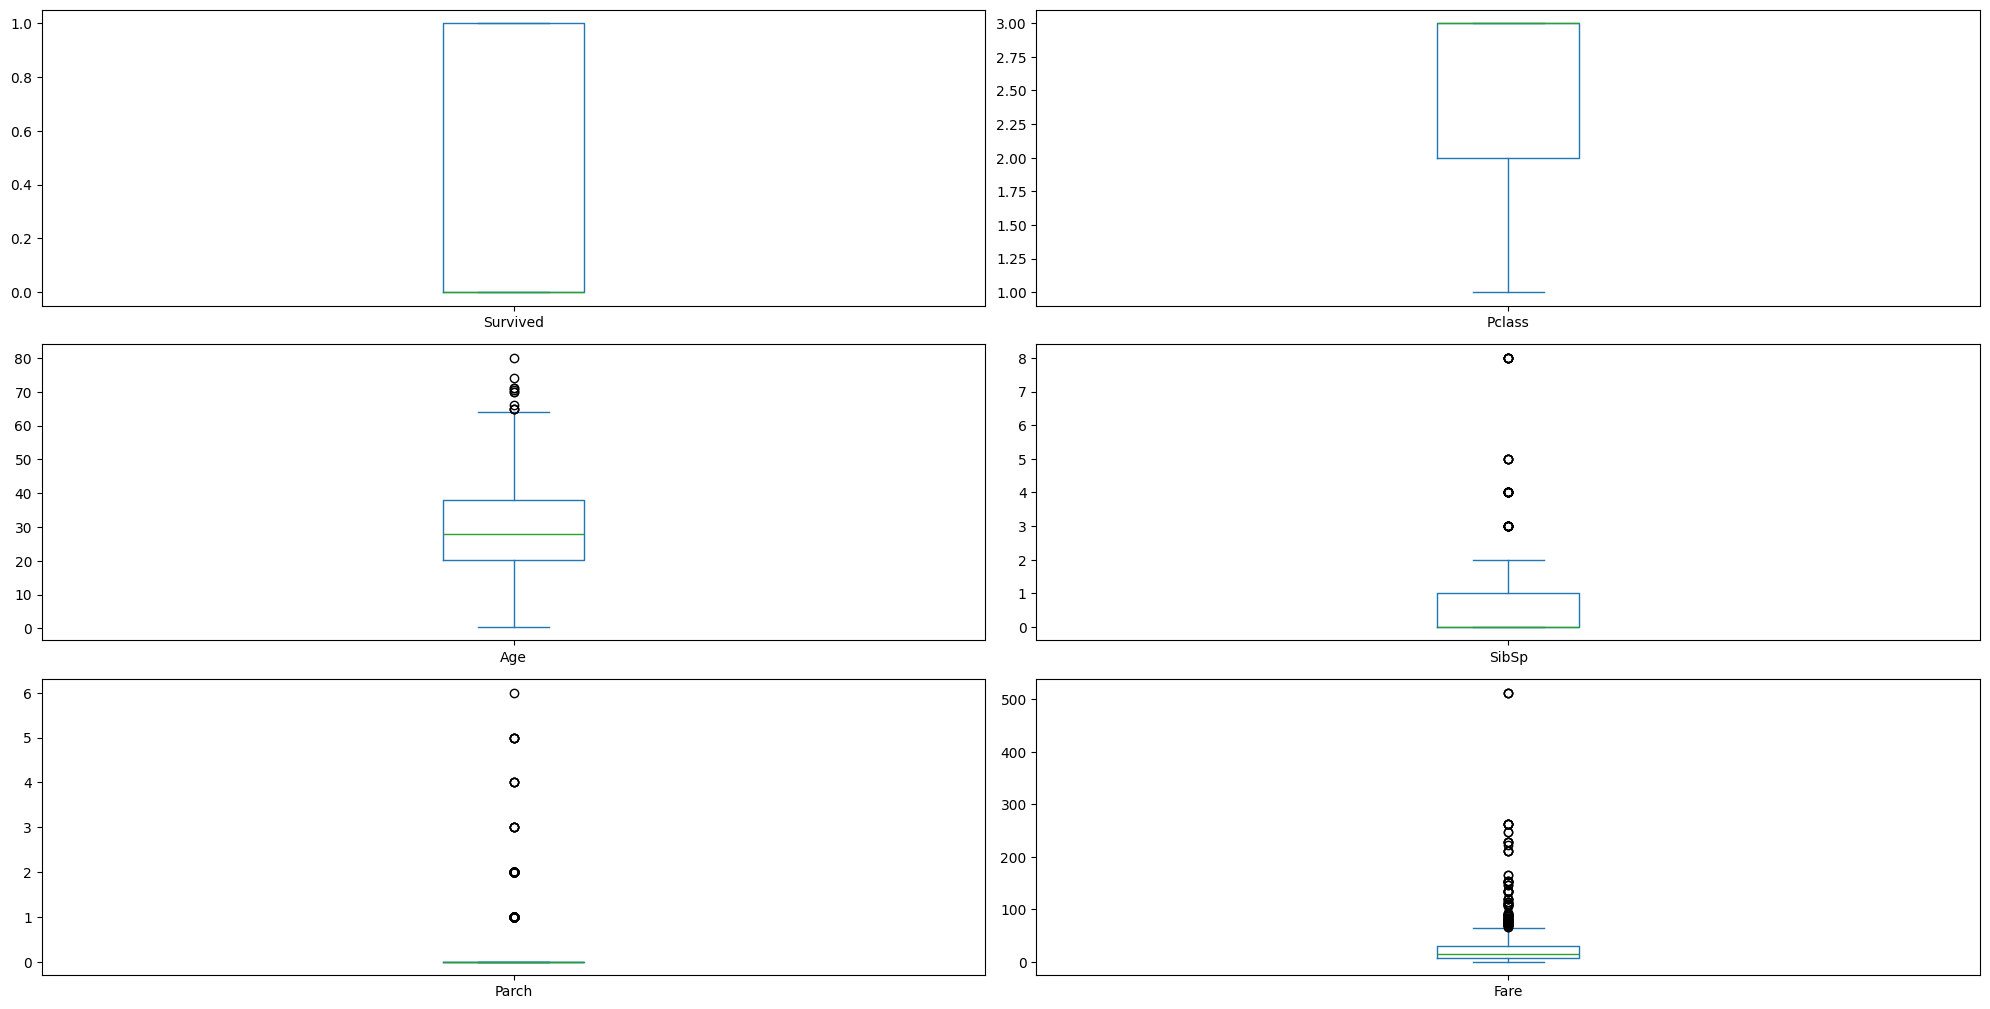

In [22]:
data.select_dtypes(include="number").plot(kind="box",layout=(6,2),figsize=(20,20),subplots=True)
plt.tight_layout()
plt.show()

In [23]:
data.Age=data.Age.fillna(data.Age.median())

In [24]:
test.Age=test.Age.fillna(data.Age.median())

In [25]:
data.Cabin=data.Cabin.fillna("Unknown")

In [26]:
test.Cabin=test.Cabin.fillna("Unknown")

In [27]:
data["deck"]=data["Cabin"].apply(lambda x:x[0])

In [28]:
test["deck"]=test["Cabin"].apply(lambda x:x[0])

In [29]:
data["cabinmissing"]=data["deck"]

In [30]:
test["cabinmissing"]=test["deck"]

In [31]:
data["cabinmissing"]=data.cabinmissing.map({"U":0})

In [32]:
test["cabinmissing"]=test.cabinmissing.map({"U":0})

In [33]:
data["cabinmissing"]=data["cabinmissing"].fillna(1)

In [34]:
test["cabinmissing"]=test["cabinmissing"].fillna(1)

In [35]:
data.drop("Cabin",axis=1,inplace=True)

In [36]:
test.drop("Cabin",axis=1,inplace=True)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    category
 3   Age           891 non-null    float64 
 4   SibSp         891 non-null    int64   
 5   Parch         891 non-null    int64   
 6   Fare          891 non-null    float64 
 7   Embarked      891 non-null    category
 8   deck          891 non-null    object  
 9   cabinmissing  891 non-null    float64 
dtypes: category(2), float64(3), int64(4), object(1)
memory usage: 57.8+ KB


In [38]:
upper=data.Age.quantile(0.95)
lower=data.Age.quantile(0.05)
data.Age=np.clip(data.Age,lower,upper)

In [39]:
upper=test.Age.quantile(0.95)
lower=test.Age.quantile(0.05)
test.Age=np.clip(test.Age,lower,upper)

In [40]:
data.SibSp=np.clip(data.SibSp,0,4)

In [41]:
test.SibSp=np.clip(test.SibSp,0,4)

In [42]:
data.Parch=np.clip(data.Parch,0,4)

In [43]:
test.Parch=np.clip(test.Parch,0,4)

In [44]:
lower1=data.Fare.quantile(0.01)
upper1=data.Fare.quantile(0.99)
data.Fare=np.clip(data.Fare,lower1,upper1)

In [45]:
lower1=test.Fare.quantile(0.01)
upper1=test.Fare.quantile(0.99)
test.Fare=np.clip(test.Fare,lower1,upper1)

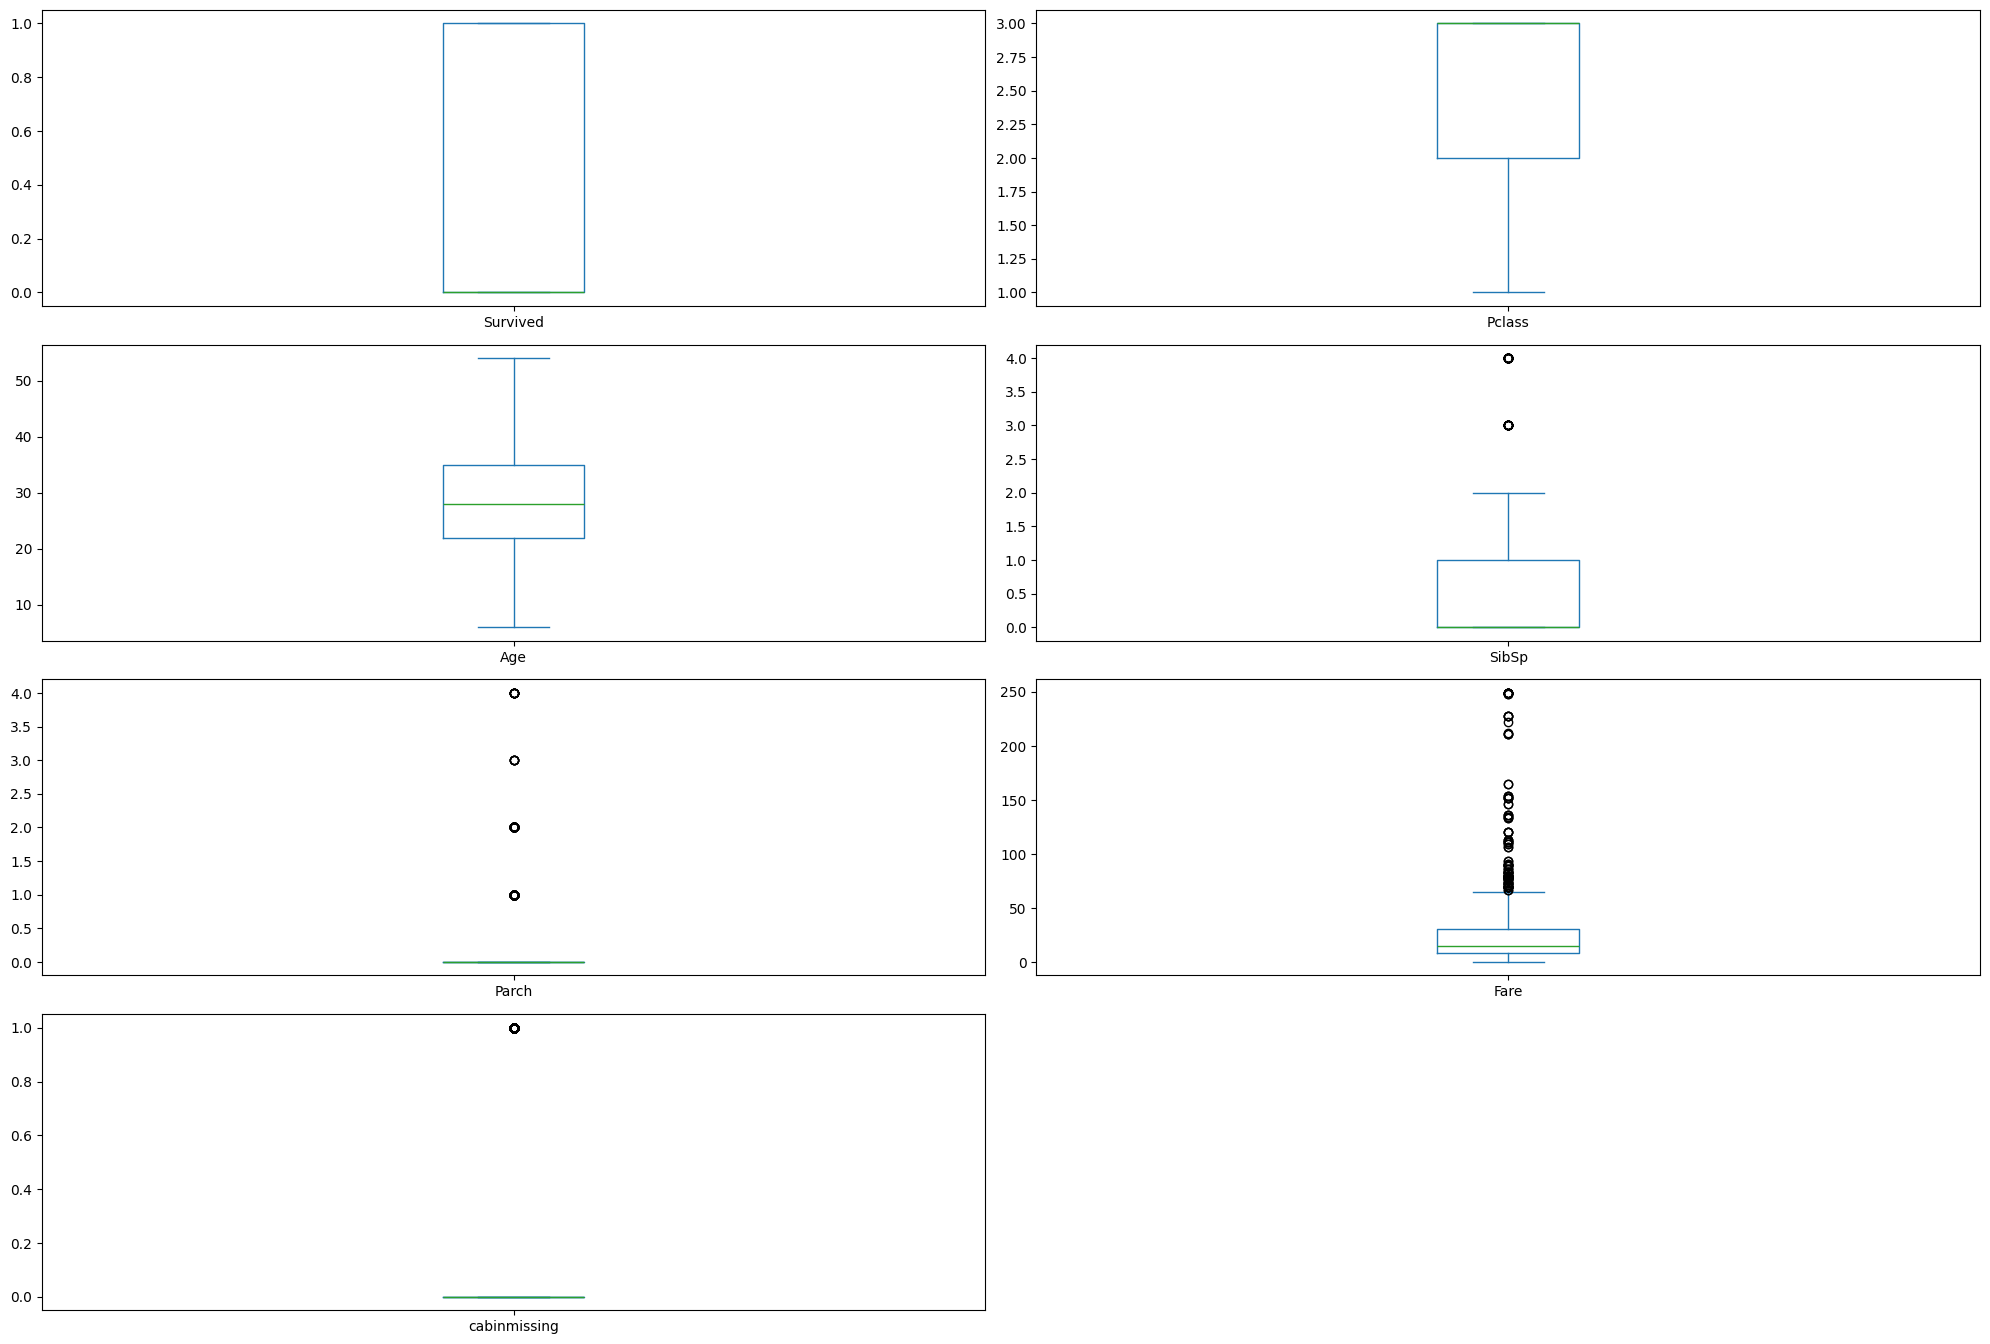

In [46]:
data.select_dtypes(include="number").plot(kind="box",layout=(6,2),figsize=(20,20),subplots=True)
plt.tight_layout()
plt.show()

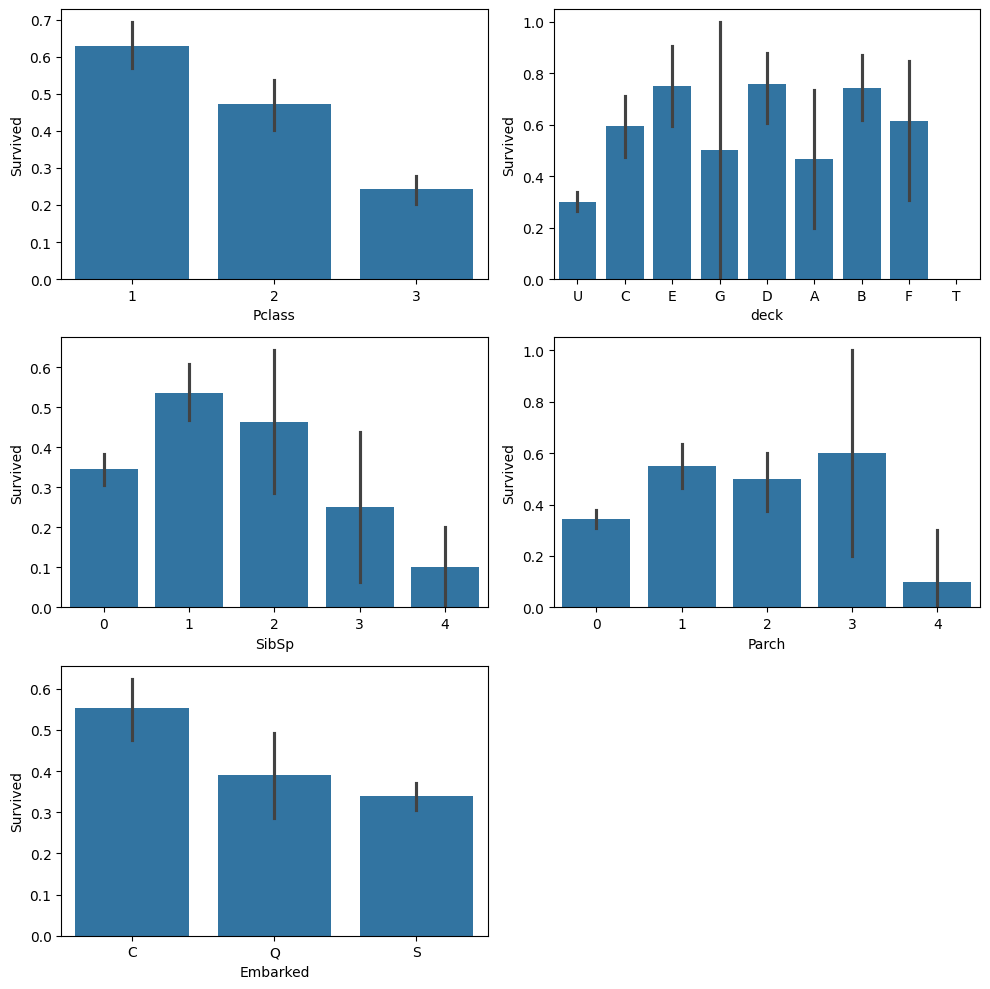

In [47]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.barplot(y="Survived",x="Pclass",data=data)

plt.subplot(3,2,2)
sns.barplot(y="Survived",x="deck",data=data)

plt.subplot(3,2,3)
sns.barplot(y="Survived",x="SibSp",data=data)

plt.subplot(3,2,4)
sns.barplot(y="Survived",x="Parch",data=data)

plt.subplot(3,2,5)
sns.barplot(y="Survived",x="Embarked",data=data)

plt.tight_layout()
plt.show()

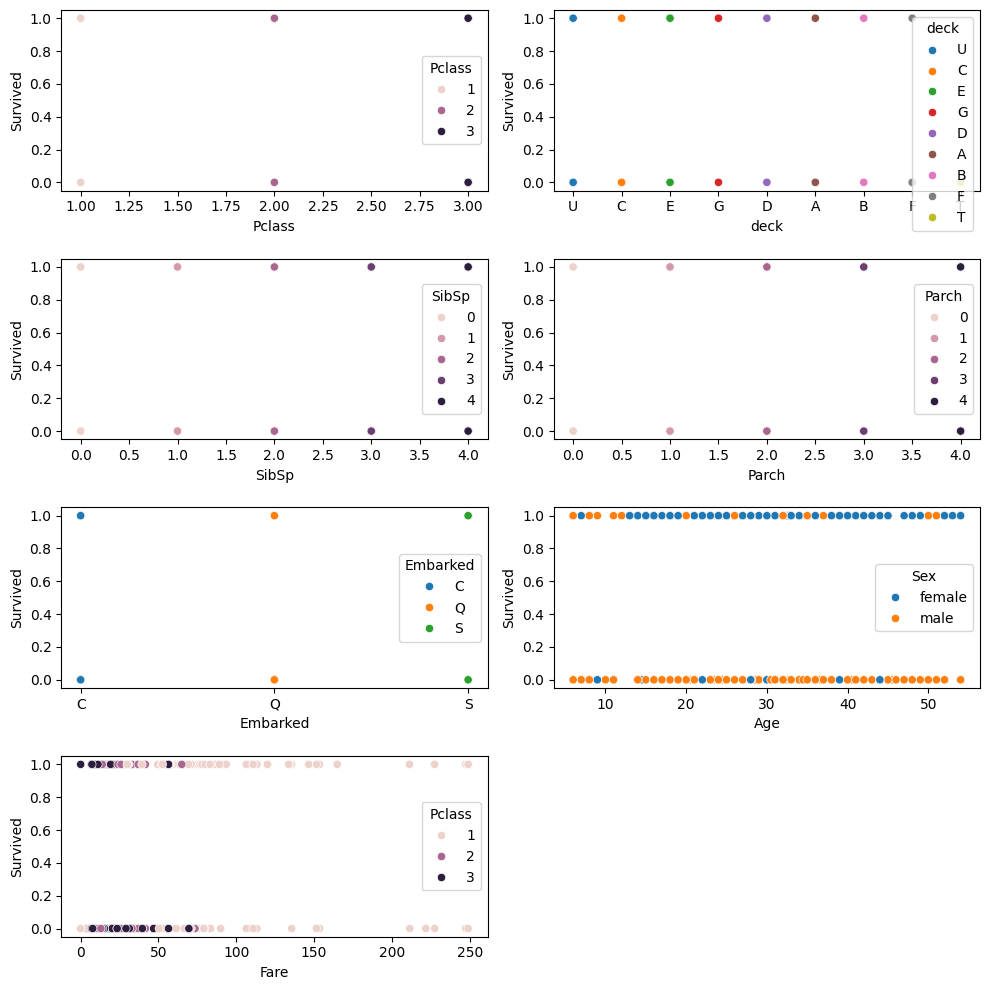

In [48]:
plt.figure(figsize=(10,10))
plt.subplot(4,2,1)
sns.scatterplot(y="Survived",x="Pclass",data=data,hue="Pclass")

plt.subplot(4,2,2)
sns.scatterplot(y="Survived",x="deck",data=data,hue="deck")

plt.subplot(4,2,3)
sns.scatterplot(y="Survived",x="SibSp",data=data,hue="SibSp")

plt.subplot(4,2,4)
sns.scatterplot(y="Survived",x="Parch",data=data,hue="Parch")

plt.subplot(4,2,5)
sns.scatterplot(y="Survived",x="Embarked",data=data,hue="Embarked")

plt.subplot(4,2,6)
sns.scatterplot(y="Survived",x="Age",data=data,hue="Sex")

plt.subplot(4,2,7)
sns.scatterplot(y="Survived",x="Fare",data=data,hue="Pclass")

plt.tight_layout()
plt.show()

In [49]:
category=data.select_dtypes(include="category")
category

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [50]:
category1=test.select_dtypes(include="category")
category1

,Sex,Embarked
0,male,Q
1,female,S
2,male,Q
3,male,S
4,female,S
...,...,...
413,male,S
414,female,C
415,male,S
416,male,S


In [51]:
one=OneHotEncoder(sparse_output=False)
onearray=one.fit_transform(category)
one_df=pd.DataFrame(onearray,columns=one.get_feature_names_out())
one_df

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0
887,1.0,0.0,0.0,0.0,1.0
888,1.0,0.0,0.0,0.0,1.0
889,0.0,1.0,1.0,0.0,0.0


In [52]:
one1=OneHotEncoder(sparse_output=False)
onearray1=one1.fit_transform(category1)
one_df1=pd.DataFrame(onearray1,columns=one1.get_feature_names_out())
one_df1

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
413,0.0,1.0,0.0,0.0,1.0
414,1.0,0.0,1.0,0.0,0.0
415,0.0,1.0,0.0,0.0,1.0
416,0.0,1.0,0.0,0.0,1.0


In [53]:
data.drop(["Sex","Embarked","deck"],axis=1,inplace=True)

In [54]:
test.drop(["Sex","Embarked","deck"],axis=1,inplace=True)

In [55]:
finaldata1=pd.concat([test,one_df1],axis=1)
finaldata1

,Pclass,Age,SibSp,Parch,Fare,cabinmissing,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0.0,0.0,1.0,0.0,1.0,0.0
1,3,47.0,1,0,7.0000,1.0,1.0,0.0,0.0,0.0,1.0
2,2,55.0,0,0,9.6875,0.0,0.0,1.0,0.0,1.0,0.0
3,3,27.0,0,0,8.6625,1.0,0.0,1.0,0.0,0.0,1.0
4,3,22.0,1,1,12.2875,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
413,3,28.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0
414,1,39.0,0,0,108.9000,0.0,1.0,0.0,1.0,0.0,0.0
415,3,38.5,0,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0
416,3,28.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0


In [56]:
finaldata=pd.concat([data,one_df],axis=1)
finaldata

,Survived,Pclass,Age,SibSp,Parch,Fare,cabinmissing,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,1.0,0.0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,0.0,1.0,0.0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1.0,1.0,0.0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0.0,0.0,1.0,0.0,0.0,1.0
887,1,1,19.0,0,0,30.0000,1.0,1.0,0.0,0.0,0.0,1.0
888,0,3,28.0,1,2,23.4500,0.0,1.0,0.0,0.0,0.0,1.0
889,1,1,26.0,0,0,30.0000,1.0,0.0,1.0,1.0,0.0,0.0


In [57]:
from sklearn.model_selection  import train_test_split
x=finaldata.drop("Survived",axis=1)
y=finaldata.Survived

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)

In [59]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [60]:
xgb=XGBClassifier(n_estimators=100,max_depth=2,learning_rate=0.2,gamma=1,random_state=42)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [61]:
xgb.score(x_test,y_test)

0.8444444444444444

In [62]:
y_pred=xgb.predict(x_test)

In [63]:
accuracy_score(y_test,y_pred)

0.8444444444444444

In [64]:
confusion_matrix(y_test,y_pred)

array([[46,  8],
       [ 6, 30]])

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.79      0.83      0.81        36

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.85      0.84      0.85        90



In [66]:
actual_test=xgb.predict(finaldata1)
actual_test
test_survived=pd.DataFrame(actual_test,columns=["Survived"])
test_survived

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [67]:
lgbm=LGBMClassifier(n_estimators=100,max_depth=3,learning_rate=0.2,random_state=42)
lgbm.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 306, number of negative: 495
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 196
[LightGBM] [Info] Number of data points in the train set: 801, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMClassifier(learning_rate=0.2, max_depth=3, random_state=42)

In [68]:
lgbm.score(x_test,y_test)

0.8222222222222222

In [69]:
y_pred1=lgbm.predict(x_test)

In [70]:
accuracy_score(y_test,y_pred1)

0.8222222222222222

In [71]:
confusion_matrix(y_test,y_pred1)

array([[45,  9],
       [ 7, 29]])

In [72]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        54
           1       0.76      0.81      0.78        36

    accuracy                           0.82        90
   macro avg       0.81      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90



In [73]:
actual_test2=lgbm.predict(finaldata1)
actual_test2
test_survived2=pd.DataFrame(actual_test2,columns=["Survived"])
test_survived2

,Survived
0,0
1,0
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [75]:
kfold=KFold(n_splits=10)
xgb=XGBClassifier(n_estimators=100,max_depth=2,learning_rate=0.2,gamma=1,random_state=42)
cross=cross_val_score(xgb,x,y,cv=kfold)
print(cross.mean())

0.8204619225967541


In [76]:
kfold=KFold(n_splits=10)
lgbm=LGBMClassifier(n_estimators=100,max_depth=3,learning_rate=0.2,random_state=42)
cross1=cross_val_score(lgbm,x,y,cv=kfold)
print(cross1.mean())

[LightGBM] [Info] Number of positive: 303, number of negative: 498
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000196 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 197
[LightGBM] [Info] Number of data points in the train set: 801, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378277 -> initscore=-0.496867
[LightGBM] [Info] Start training from score -0.496867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [77]:
params={"n_estimators":[100,150,200,250,300]
       ,"max_depth":[2,3,4,5],
       "learning_rate":[0.1,0.2,0.3,0.15,0.25,0.09,0.01],
       "gamma":[0,1,2,3,0.5]}
grid=GridSearchCV(xgb,param_grid=params,cv=10)
grid.fit(x,y)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=1, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'gamma': [0, 1, 2, 3, 0.5],
                         'learning_rate': [0.1, 0.2, 0.3, 0.15, 0.25, 0.09,
                                           0.01],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [78]:
kfold=KFold(n_splits=10)
xgbf=XGBClassifier(n_estimators=200,max_depth=4,learning_rate=0.1,gamma=0,random_state=42)
crossf=cross_val_score(xgbf,x,y,cv=kfold)
print(crossf.mean())

0.833932584269663


In [79]:
grid.best_params_

{'gamma': 0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200}

In [80]:
grid.best_score_

np.float64(0.8383895131086142)

In [84]:
params={"n_estimators":[100,150,200,250,300]
       ,"max_depth":[2,3,4,5],
       "learning_rate":[0.1,0.2,0.3,0.15,0.25,0.09,0.01]}
lgbm=LGBMClassifier()
grid=GridSearchCV(lgbm,param_grid=params,cv=10)
grid.fit(x,y)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 308, number of negative: 494
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000114 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Numbe

GridSearchCV(cv=10, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.15, 0.25, 0.09,
                                           0.01],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [85]:
grid.best_params_

{'learning_rate': 0.25, 'max_depth': 3, 'n_estimators': 100}

In [86]:
grid.best_score_


np.float64(0.835043695380774)

1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

Both XGBoost and LightGBM achieved an accuracy of 82% on the test set, with similar precision, recall, and F1-scores across both classes.

Class 0 (Did Not Survive): Precision = 0.86, Recall = 0.87, F1 = 0.86

Class 1 (Survived): Precision = 0.73, Recall = 0.72, F1 = 0.72

This indicates that both models performed equally well in distinguishing survivors from non-survivors.
However, LightGBM is typically faster and more memory-efficient than XGBoost, which makes it preferable for larger datasets.
On the Titanic dataset, both algorithms produced nearly identical results, confirming that gradient boosting methods are highly effective for binary classification problems with structured tabular data.